# Chapter 1. The Machine Learning Landscape

## What is Machine Learning?

- Machine Learning is the science of programming computers so they can learn from data.

> A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E. -- Tom Mitchell, 1997.

**Example: spam filter**
- Task T: to flag spam for new emails
- Experience E: existing emails with labels (either spam or non-spam)
- Performance measure P: ratio of correctly classified emails

**Non-example**: the collection of Wikipedia pages

## Why Use Machine Learning?

Traditional approach for spam filter:
1. Choose features of spam emails manually: "4U", "credit card", "free", "amazing"
2. Write an program to detect exactly the features you chose
3. Test the program and modify the features until satisfactory

Drawbacks of traditional approach: 
1. A large amount of features are needed - hard to maintain
2. Spammers may change their writing to avoid explicit rules: change "4U" to "For U".
3. For some complex problems, manually-engineered features are not good enough: hand-written digits

Machine Learning models:
1. Automatically learns which words and phrases are good predictors of spam. 
2. Since the program is not a stack of explicit rules, it is much shorter, easier to maintain, and most likely more accurate.
3. With new training data, the Machine Learning model can update automatically to capture new indicators of spam emails.

What Machine Learning is great for:
1. Problems for which existing solutions require a lot of hand-tuning or long lists of rules: one Machine Learning algorithm can often simplify code and perform better.
2. Complex problems for which there is no good solution at all using a traditional approach: the best Machine Learning techniques can find a solution.
3. Fluctuating environments: a Machine Learning system can adapt to new data.
4. Large amount of data: With Machine Learning, computers process big data faster than human.



## Example Project: Men's Height in the United States

As an illustration of machine learning practice, let's consider the task of understanding the trend of American men's height in the 20th century. This project requires the following stages:
- Data preparation
- Data exploration
- Model training
- Model evaluation
- Model application

## Part I: Data Preparation
- Download data
- Load data into Python
- Extract US data
- Clean the dataset

### 1. Download Data
- Go to website:  https://ourworldindata.org/human-height
- Find the interactive chart "Increase of human height over two centuries"
- Click the "DATA" tab, and download a CSV (comma-separated-values) file containing height data.

When the data file is downloaded, you can open it with Microsoft Excel to see its content.

### 2. Load Data into Python
- Open Jupyter Notebook.
- Import numpy, pandas, and matplotlib.
- Identify the directory that contains the .csv file (either *absolute path* or *relative path*)
- Load the data as a DataFrame using the following statement:
`raw_data = pd.read_csv(path + filename, delimiter=',')`

Now the data in the .csv file are loaded to the DataFrame `raw_data`. You can display its first 5 rows using `raw_data.head()`.

In [2]:
import numpy as np  # scientific computation
import pandas as pd  # data handling
import matplotlib.pyplot as plt  # plotting
# The following magic command allows figures in notebook
%matplotlib inline  

In [5]:
path = "C:\\Users\\ch002\\Dropbox\\Teaching\\CMP 414\\Data\\"
filename = "Week2.csv"
raw_data = pd.read_csv(path + filename, delimiter=',')

In [6]:
raw_data.head()

,Entity,Code,Year,Unnamed: 3
0,Afghanistan,AFG,1870,168.4
1,Afghanistan,AFG,1880,165.7
2,Afghanistan,AFG,1930,166.8
3,Albania,ALB,1880,170.1
4,Albania,ALB,1890,169.8


In [7]:
# Load the data using relative path
# Display current working directory:
import os
print(os.getcwd())

C:\Users\ch002\Dropbox\Teaching\CMP 414


In [8]:
path = "Data/" # the "Data" sub-folder from current working directory
raw_data = pd.read_csv(path + filename, delimiter=',')
raw_data.head()

,Entity,Code,Year,Unnamed: 3
0,Afghanistan,AFG,1870,168.4
1,Afghanistan,AFG,1880,165.7
2,Afghanistan,AFG,1930,166.8
3,Albania,ALB,1880,170.1
4,Albania,ALB,1890,169.8


In [13]:
raw_data = pd.read_csv("Data/Week2.csv", delimiter=",")
raw_data.head()

,Entity,Code,Year,Unnamed: 3
0,Afghanistan,AFG,1870,168.4
1,Afghanistan,AFG,1880,165.7
2,Afghanistan,AFG,1930,166.8
3,Albania,ALB,1880,170.1
4,Albania,ALB,1890,169.8


### DataFrame
Data frame is a way to store data in rectangular grids that can easily be overviewed. Each row of these grids corresponds to measurements or values of an instance, while each column is a vector containing data for a specific variable. A data frame's row may contain different types of values: numeric, character, logical, etc.

Data frames in Python come with the Pandas libarary, and they are defined as a two-dimensional labeled data structures with columns of potentially different types.

Toturials of Pandas can be found here:

https://pandas.pydata.org/pandas-docs/stable/10min.html

https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python

### 3. Extract US Data
- Create a filter on the rows with condition "Entity = United States"
- Use the filter to select rows related to US.
- Create another filter with condition "Year >= 1900", and use it to filter the data.
- Display the resulting data frame.

In [14]:
filter1 = (raw_data['Entity'] == "United States")
print(filter1)

0       False
1       False
2       False
3       False
4       False
        ...  
1245    False
1246    False
1247    False
1248    False
1249    False
Name: Entity, Length: 1250, dtype: bool


In [16]:
filter1 = (raw_data['Entity'] == "United States")
data = raw_data[filter1]
data

,Entity,Code,Year,Unnamed: 3
1194,United States,USA,1820,172.2
1195,United States,USA,1830,173.5
1196,United States,USA,1840,172.2
1197,United States,USA,1850,171.1
1198,United States,USA,1860,170.6
1199,United States,USA,1870,171.1
1200,United States,USA,1880,169.5
1201,United States,USA,1890,169.1
1202,United States,USA,1900,170.0
1203,United States,USA,1910,172.1


In [17]:
filter2 = (data['Year'] >= 1900)
data = data[filter2]
data

,Entity,Code,Year,Unnamed: 3
1202,United States,USA,1900,170.0
1203,United States,USA,1910,172.1
1204,United States,USA,1920,173.1
1205,United States,USA,1930,173.4
1206,United States,USA,1940,176.1
1207,United States,USA,1950,177.1
1208,United States,USA,1960,177.3
1209,United States,USA,1970,178.3
1210,United States,USA,1980,179.0


### 4. Clean the Dataset
1. Reset the index.
2. Remove Entity and Code column.
3. Give a proper name to height column

In [18]:
temp = data.set_index(["Year"])
temp

,Entity,Code,Unnamed: 3
Year,,,
1900,United States,USA,170.0
1910,United States,USA,172.1
1920,United States,USA,173.1
1930,United States,USA,173.4
1940,United States,USA,176.1
1950,United States,USA,177.1
1960,United States,USA,177.3
1970,United States,USA,178.3
1980,United States,USA,179.0


In [19]:
data = data.set_index(["Year"])
data

,Entity,Code,Unnamed: 3
Year,,,
1900,United States,USA,170.0
1910,United States,USA,172.1
1920,United States,USA,173.1
1930,United States,USA,173.4
1940,United States,USA,176.1
1950,United States,USA,177.1
1960,United States,USA,177.3
1970,United States,USA,178.3
1980,United States,USA,179.0


In [20]:
data.drop(['Entity', 'Code'], axis=1, inplace=True) # axis specifies row drop or column drop
data

,Unnamed: 3
Year,
1900,170.0
1910,172.1
1920,173.1
1930,173.4
1940,176.1
1950,177.1
1960,177.3
1970,178.3
1980,179.0


In [21]:
data = data.rename(columns={'Unnamed: 3': "Height(cm)"})
data

,Height(cm)
Year,
1900,170.0
1910,172.1
1920,173.1
1930,173.4
1940,176.1
1950,177.1
1960,177.3
1970,178.3
1980,179.0


## Part II: Data Exploration

### 1. Plot height vs. year
- Extract the list of heights.
- Extract the list of years.
- Use `plt.plot()` to create a scatter plot.

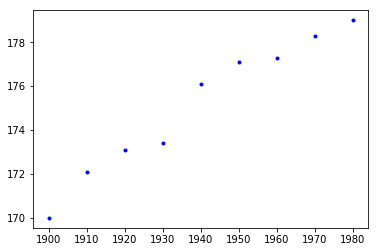

In [40]:
heights = data['Height(cm)']
years = data.index
plt.plot(years, heights, 'b.')

**How would you describe the trend?**

### 2. Calculate the rate of height change
- The formula is given as
$$rate = \frac{\textit{difference in heights}}{\textit{difference in years}}$$
- For each decade, compute its average rate of change
- Plot the rates vs. years

In [41]:
rates_height_change = []
for year in data.index:
    if year == 1900:
        continue
    else:
        previous_year = year - 10
        diff_heights = data.loc[year, 'Height(cm)'] - \
                       data.loc[previous_year, 'Height(cm)']
        rate = diff_heights / 10
        rates_height_change.append(rate)
print(rates_height_change)

[0.20999999999999944, 0.1, 0.030000000000001137, 0.26999999999999885, 0.1, 0.020000000000001704, 0.1, 0.06999999999999887]


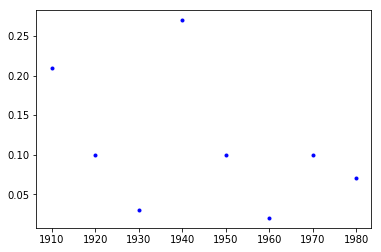

In [43]:
plt.plot(years[1:], rates_height_change, 'b.')

## Part III: Modeling

Since we haven't studied any modeling method yet, let's use our intuition to find a function that describes the relation between year and height.
- Linear model ($height = m \cdot year + b$) seems a good fit to the data.
- What is a good value for $m$?
- What is a good value for $b$?
- Plot the line represented by the linear model
    - Create a list of x-coordinates using `np.linspace`
    - Calculate the corresponding y-coordinates
    - Use these two lists to plot the line.

In [45]:
m = np.mean(rates_height_change)
b = data.loc[1900, 'Height(cm)'] - m * 1900
print(m, b)

0.1125 -43.75


In [50]:
x_coordinates = np.linspace(1900, 1999, 100)
print(x_coordinates)

[1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911.
 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920. 1921. 1922. 1923.
 1924. 1925. 1926. 1927. 1928. 1929. 1930. 1931. 1932. 1933. 1934. 1935.
 1936. 1937. 1938. 1939. 1940. 1941. 1942. 1943. 1944. 1945. 1946. 1947.
 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959.
 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971.
 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983.
 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995.
 1996. 1997. 1998. 1999.]


In [51]:
y_coordinates = m * x_coordinates + b
print(y_coordinates)

[170.     170.1125 170.225  170.3375 170.45   170.5625 170.675  170.7875
 170.9    171.0125 171.125  171.2375 171.35   171.4625 171.575  171.6875
 171.8    171.9125 172.025  172.1375 172.25   172.3625 172.475  172.5875
 172.7    172.8125 172.925  173.0375 173.15   173.2625 173.375  173.4875
 173.6    173.7125 173.825  173.9375 174.05   174.1625 174.275  174.3875
 174.5    174.6125 174.725  174.8375 174.95   175.0625 175.175  175.2875
 175.4    175.5125 175.625  175.7375 175.85   175.9625 176.075  176.1875
 176.3    176.4125 176.525  176.6375 176.75   176.8625 176.975  177.0875
 177.2    177.3125 177.425  177.5375 177.65   177.7625 177.875  177.9875
 178.1    178.2125 178.325  178.4375 178.55   178.6625 178.775  178.8875
 179.     179.1125 179.225  179.3375 179.45   179.5625 179.675  179.7875
 179.9    180.0125 180.125  180.2375 180.35   180.4625 180.575  180.6875
 180.8    180.9125 181.025  181.1375]


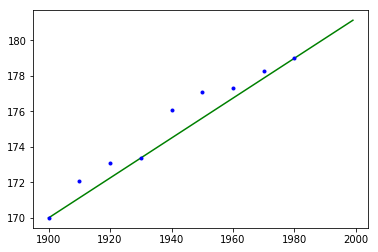

In [52]:
plt.plot(x_coordinates, y_coordinates, 'g-')
plt.plot(years, heights, 'b.')

**Discussion:**
- How should we evaluate this model?
- Can you find a line that fits the model better?

## Part IV: Model Evaluation
- Objective: find a linear model whose predictions are *close* to the actual values.
- Metric on closeness: **mean square error (MSE):**
$$MSE = \frac{1}{\textit{number of data}}\sum_{\text{(x, y) in dataset}}(mx + b - y)^2$$

Now that we have multiple model candidates, which one gives the smallest MSE?

## Part V: Use the Model
- What is your prediction on the average height in 1890?, 2000? 2050?
- Check with the raw dataset and see if your 1890 prediction is close.

## Various Types of Machine Learning
- Supervised vs. Unsupervised Learning
- Regression vs. Classification
- Semisupervised, reinforcement, transfer learning, adverseral learning...
- Online learning
- Instance based vs. model based learning

## Challenges of Machine Learning
- Insufficient quantity of training data
- Non-representative training data
- Irrelevant features

## Two Machine Learning Guidelines
- No Free Lunch Theorem
- Curse of Dimensionality

# Homework (Due on Monday, Feb 10th at 11:59pm)

Please create a new Jupyter notebook and enter your answers. All python code needs to be executed to show the results. After completion, print the notebook as a PDF file. For most browers, this can be done by pressing "Ctrl + P", and then choose "Print as PDF". Submit the PDF file to Blackboard under "Week2 Homework".

1. Describe two real-life applications in which classification might be useful.
2. Describe two real-life applications in which regression might be useful.
3. Describe two real-life applications in which unsupervised learning might be useful
4. Build a linear model (height = m * year + b) to escribe the trend of height increase for United Kingdom between 1900 and 1980. Compute the mean square error of your model, and display the model line together with the data points.